In [2]:
%load_ext autoreload
%autoreload 2
import xarray as xr
from cdo import Cdo
import os
import glob
from src.Experiments_infos import Data
import xarray as xr
import numpy as np
import  matplotlib.pyplot as plt
from src.Enumerations import Season
from src.plot_funcs import plot_contourf_rotated_grid


/work/aa0238/a271093/Conda/MOAAP_env/lib/python3.12/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [3]:

exp = Data.ICON_CNRM_EXP
cdo = Cdo()
level=70000

In [9]:
year_start= 1984
year_end= 2014


[]

In [6]:
paths_reg = sorted(glob.glob(exp.FI850p_path_raw+f'FI700p_*-*.ncz'))
paths_reg
" ".join(exp.gph_files_raw_gcm)

'/pool/data/CMIP6/data/CMIP/CNRM-CERFACS/CNRM-ESM2-1/historical/r1i1p1f2/day/zg/gr/v20181206/zg_day_CNRM-ESM2-1_historical_r1i1p1f2_gr_19750101-19991231.nc /pool/data/CMIP6/data/CMIP/CNRM-CERFACS/CNRM-ESM2-1/historical/r1i1p1f2/day/zg/gr/v20181206//zg_day_CNRM-ESM2-1_historical_r1i1p1f2_gr_20000101-20141231.nc'

In [10]:
paths_reg = sorted(glob.glob(exp.FI700p_path_raw+f'FI700p_*-*.ncz'))

cdo.selyear(f'{year_start}/{year_end}',
            input = '-divc,9.81 -daymean -mergetime '+' '.join(paths_reg),
            output = f'{exp.scratch_path}gph{level}_reg_dummy.nc' )
             
cdo.remapbil(exp.regional_30km_target_grid,
             input=  f'{exp.scratch_path}gph{level}_reg_dummy.nc',
             output= f'{exp.scratch_path}gph{level}_reg_CNRM_3dx3dy.nc')
             
#os.system(f"rm {exp.scratch_path}gph{level}_dummy.nc")



'/work/aa0238/a271093/scratch/gph70000_reg_CNRM_3dx3dy.nc'

In [11]:

cdo.remapbil(exp.regional_30km_target_grid,
             input= f'-selyear,{year_start}/{year_end} -sellevel,{level} -mergetime  '+" ".join(exp.gph_files_raw_gcm),
             output = f'{exp.scratch_path}gph{level}_gcm_CNRM_3dx3dy.nc' )

'/work/aa0238/a271093/scratch/gph70000_gcm_CNRM_3dx3dy.nc'

In [12]:
gph_reg=xr.load_dataset(f'{exp.scratch_path}gph{level}_reg_CNRM_3dx3dy.nc')
#gph_reg = gph_reg.sel(time=~((gph_reg.time.dt.month == 2) & (gph_reg.time.dt.day == 29)))

gph_gcm=xr.load_dataset(f'{exp.scratch_path}gph{level}_gcm_CNRM_3dx3dy.nc')
gph_gcm = np.squeeze(gph_gcm)

Season.WINTER
Season.SPRING
Season.SUMMER
Season.AUTUMN


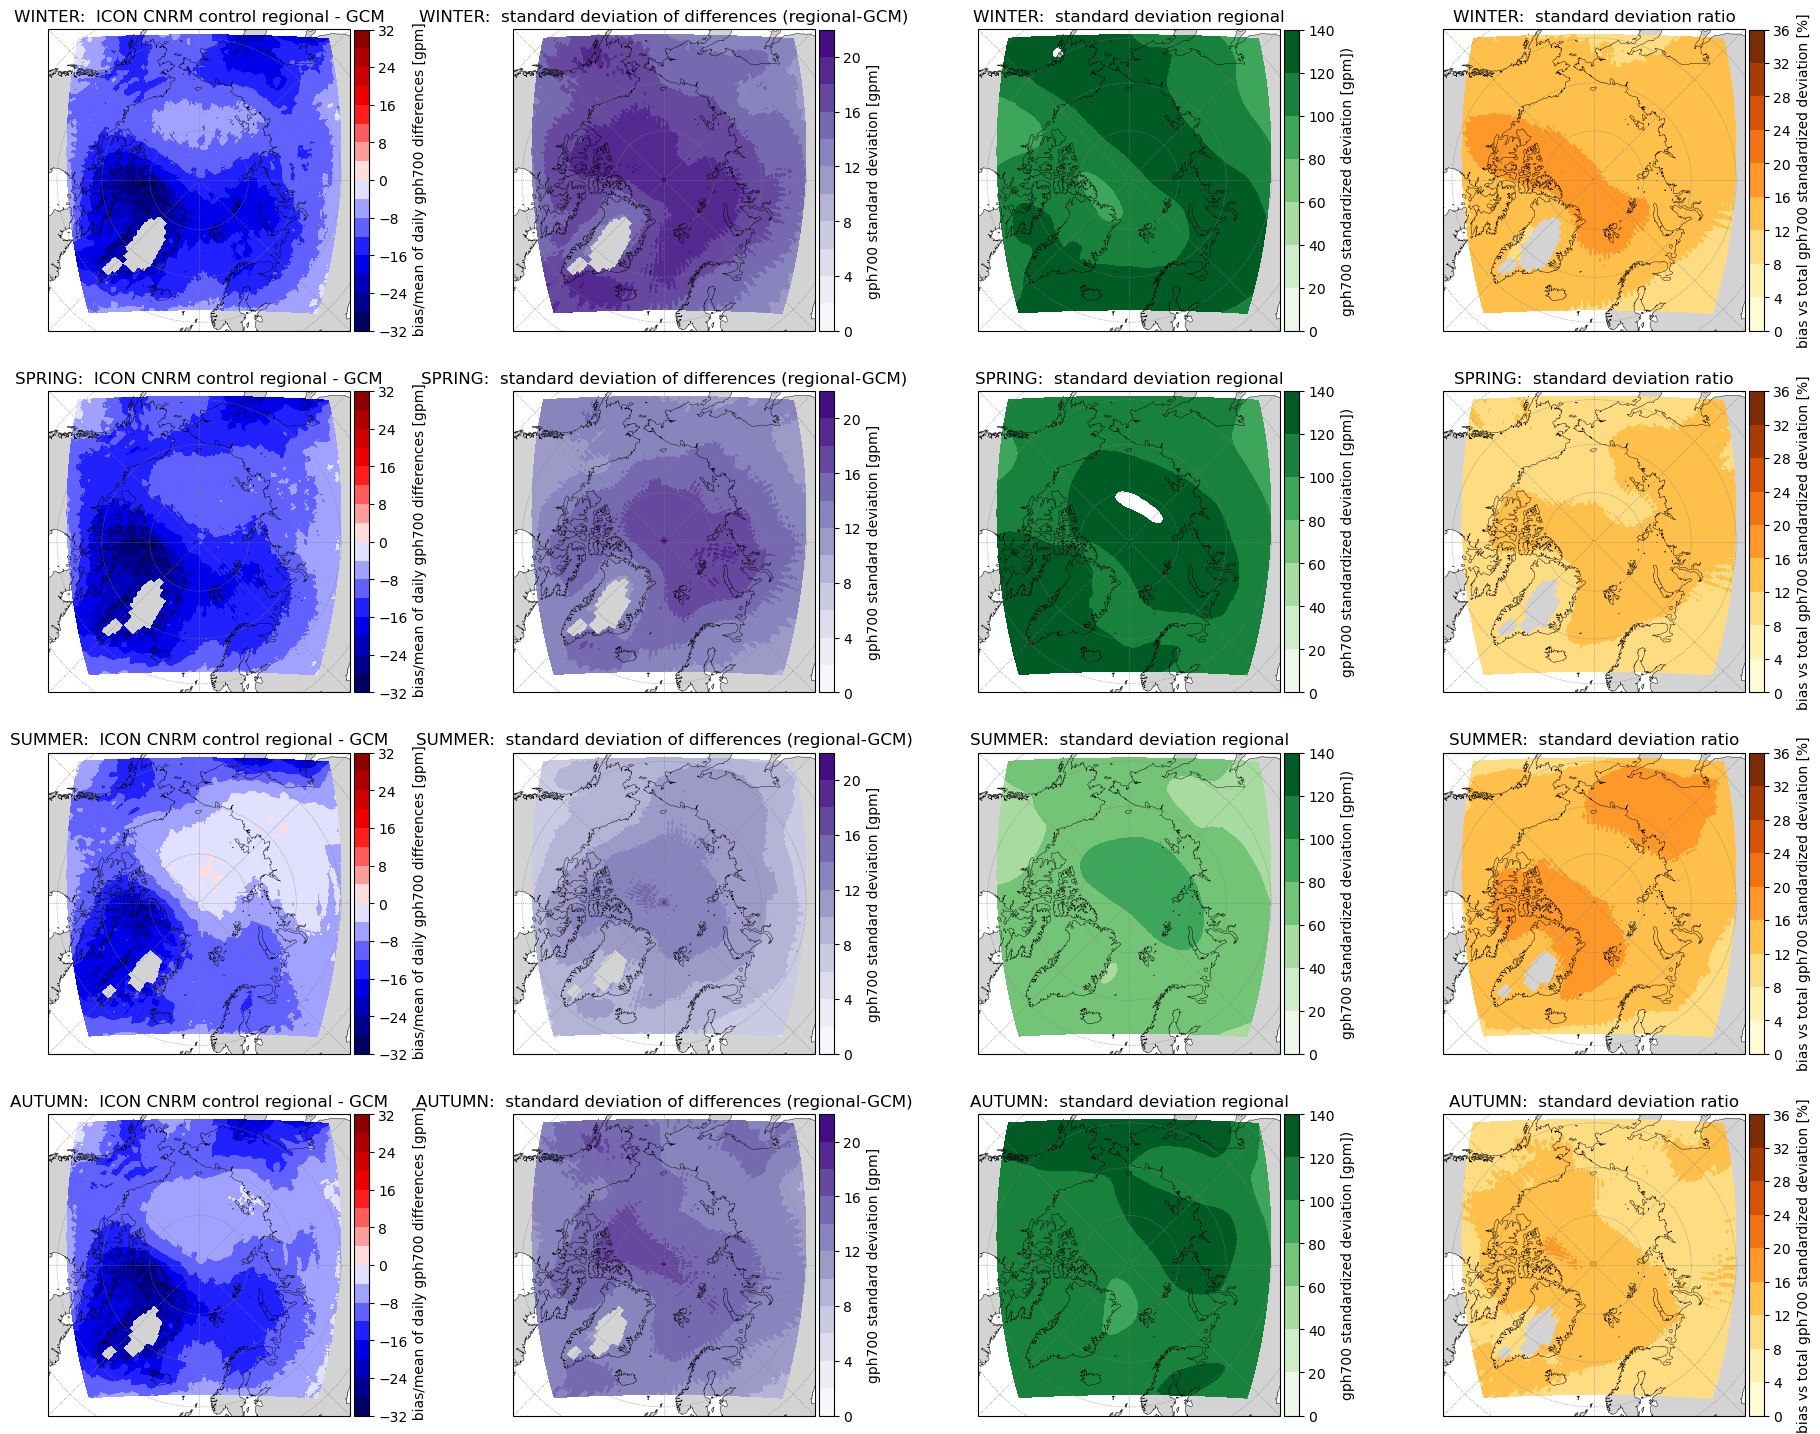

In [29]:
fig = plt.figure(figsize=(23,18))
for  season_, i in zip(Season,[0,4,8,12]):
    print (season_)
    reg_sel = gph_reg.sel(time=gph_reg.time.dt.month.isin(season_.value))
    gcm_sel = gph_gcm.sel(time=gph_gcm.time.dt.month.isin(season_.value))
    
    error = np.mean((reg_sel.FI.values - gcm_sel.zg.values), axis=0)


    plot_contourf_rotated_grid(gph_reg.rlon.values,
                               gph_reg.rlat.values,
                               error, index =i,
                               fig = fig,
                               subplts=(4,4),
                               title=f'{season_.name}:  ICON CNRM control regional - GCM',
                              levels =np.arange(-32,33,4),
                              cbar_label= "  bias/mean of daily gph700 differences [gpm] ",
                              cmap="seismic")
    
    
    std_bias = np.std((reg_sel.FI.values- gcm_sel.zg.values),axis=0)
                  
    plot_contourf_rotated_grid(gph_reg.rlon.values,
                               gph_reg.rlat.values,
                               std_bias, index =i+1,
                               fig = fig,
                               subplts=(4,4),
                               title=f'{season_.name}:  standard deviation of differences (regional-GCM)',
                              #levels =np.arange(0,25,2),
                              levels =np.arange(0,24,2),

                              cbar_label= "gph700 standard deviation [gpm]",
                              cmap="Purples")

    std_tot  = np.std(reg_sel.FI.values,axis=0)
    
    plot_contourf_rotated_grid(gph_reg.rlon.values,
                               gph_reg.rlat.values,
                               std_tot, index =i+2,
                               fig = fig,
                               subplts=(4,4),
                               title=f'{season_.name}:  standard deviation regional',
                              levels =np.arange(0,160,20),
                              cbar_label= "gph700 standardized deviation [gpm])",
                              cmap="Greens")
    
    plot_contourf_rotated_grid(gph_reg.rlon.values,
                               gph_reg.rlat.values,
                               (std_bias/std_tot)*100, index =i+3,
                               fig = fig,
                               subplts=(4,4),
                               title=f'{season_.name}:  standard deviation ratio',
                              levels =np.arange(0,40,4),
                              cbar_label= "bias vs total gph700 standardized deviation [%]",
                              cmap="YlOrBr")

In [31]:
gcm_sel.zg

<xarray.DataArray 'zg' (time: 2821, rlat: 194, rlon: 193)> Size: 422MB
array([[[2998.4016, 2995.6997, 2992.9478, ..., 3104.367 , 3109.3955,
         3114.3533],
        [2996.4604, 2993.7412, 2991.08  , ..., 3102.5007, 3107.5576,
         3112.542 ],
        [2994.4753, 2991.736 , 2988.8044, ..., 3101.1619, 3105.8416,
         3110.6848],
        ...,
        [3091.1394, 3089.423 , 3087.6865, ..., 3013.993 , 3013.3086,
         3012.6362],
        [3091.7505, 3090.0396, 3088.306 , ..., 3014.6882, 3014.005 ,
         3013.3333],
        [3092.4124, 3090.704 , 3088.9736, ..., 3015.0393, 3014.6484,
         3014.015 ]],

       [[3034.602 , 3030.6985, 3026.8625, ..., 3071.2021, 3077.291 ,
         3083.2922],
        [3032.5562, 3028.6155, 3024.7532, ..., 3066.0076, 3072.137 ,
         3078.1763],
        [3030.449 , 3026.4807, 3022.5042, ..., 3060.4814, 3067.1528,
         3073.325 ],
...
        [3237.1467, 3236.4453, 3235.6892, ..., 2752.2302, 2755.464 ,
         2758.7507],
        [3233.9917, 3233.2573, 3232.4946, ..., 2762.1328, 2765.3267,
         2768.5735],
        [3230.8318, 3230.091 , 3229.3223, ..., 2772.2412, 2775.2346,
         2778.4197]],

       [[2706.8555, 2702.845 , 2698.5713, ..., 2819.5386, 2824.2031,
         2828.9993],
        [2708.9722, 2704.9558, 2700.7705, ..., 2816.4414, 2821.1306,
         2825.9534],
        [2711.294 , 2707.2798, 2703.3894, ..., 2814.0693, 2817.9414,
         2822.9944],
        ...,
        [3239.0334, 3239.158 , 3239.2605, ..., 2713.3218, 2719.7458,
         2726.1887],
        [3236.5002, 3236.5974, 3236.6995, ..., 2719.1152, 2725.4924,
         2731.8887],
        [3233.9136, 3234.0103, 3234.1113, ..., 2725.2737, 2731.3271,
         2737.6475]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 23kB 1984-09-01T12:00:00 ... 2014-11-30T12...
    lon      (rlat, rlon) float32 150kB 137.6 137.8 138.1 ... -39.35 -39.62
    lat      (rlat, rlon) float32 150kB 47.63 47.83 48.03 ... 53.04 52.85 52.66
  * rlon     (rlon) float32 772B -29.9 -29.6 -29.3 -29.0 ... 26.8 27.1 27.4 27.7
  * rlat     (rlat) float32 776B -24.2 -23.9 -23.6 -23.3 ... 32.8 33.1 33.4 33.7
    plev     float32 4B 7e+04
Attributes:
    standard_name:       geopotential_height
    long_name:           Geopotential Height
    units:               m
    grid_mapping:        rotated_pole
    online_operation:    average
    cell_methods:        time: mean
    interval_operation:  900 s
    interval_write:      1 d
    description:         Geopotential Height
    history:             none
    cell_measures:       area: areacella

In [30]:
reg_sel.FI

<xarray.DataArray 'FI' (time: 2821, rlat: 194, rlon: 193)> Size: 422MB
array([[[2983.1223, 2978.5032, 2975.9504, ..., 3099.9548, 3104.2915,
         3109.9949],
        [2980.7898, 2977.055 , 2973.7063, ..., 3097.807 , 3103.277 ,
         3107.5364],
        [2979.564 , 2976.7678, 2974.54  , ..., 3098.0684, 3102.3323,
         3106.5552],
        ...,
        [3085.8447, 3083.541 , 3081.6611, ..., 3004.2395, 3003.459 ,
         3002.214 ],
        [3087.8145, 3084.9954, 3082.0676, ..., 3004.9902, 3004.3694,
         3003.375 ],
        [3087.6897, 3086.069 , 3083.537 , ..., 3005.924 , 3005.5793,
         3004.4563]],

       [[3011.5186, 3006.037 , 3003.1658, ..., 3075.9812, 3081.5042,
         3089.312 ],
        [3008.7107, 3003.541 , 3000.059 , ..., 3069.7512, 3077.9604,
         3083.3623],
        [3009.1218, 3004.6487, 3001.39  , ..., 3068.0388, 3073.7751,
         3079.387 ],
...
        [3230.1904, 3228.8257, 3227.9731, ..., 2760.9814, 2766.4856,
         2765.3525],
        [3227.1262, 3226.539 , 3224.0337, ..., 2768.8105, 2774.1797,
         2776.554 ],
        [3223.9653, 3222.9504, 3221.669 , ..., 2780.3113, 2785.87  ,
         2789.7273]],

       [[2682.772 , 2674.8623, 2668.4558, ..., 2809.119 , 2813.2341,
         2819.271 ],
        [2684.7683, 2677.6921, 2671.8982, ..., 2806.1294, 2811.7634,
         2816.2463],
        [2690.5076, 2684.1055, 2680.7305, ..., 2805.9722, 2810.1763,
         2814.865 ],
        ...,
        [3235.4172, 3235.2085, 3235.177 , ..., 2703.4592, 2710.7922,
         2713.3767],
        [3232.562 , 3233.0613, 3232.3267, ..., 2708.4153, 2715.7424,
         2720.5488],
        [3230.2588, 3230.1228, 3230.0625, ..., 2716.1638, 2723.271 ,
         2730.0852]]], dtype=float32)
Coordinates:
  * time      (time) datetime64[ns] 23kB 1984-09-01T09:00:00 ... 2014-11-30T0...
    lon       (rlat, rlon) float32 150kB 137.6 137.8 138.1 ... -39.35 -39.62
    lat       (rlat, rlon) float32 150kB 47.63 47.83 48.03 ... 53.04 52.85 52.66
  * rlon      (rlon) float32 772B -29.9 -29.6 -29.3 -29.0 ... 27.1 27.4 27.7
  * rlat      (rlat) float32 776B -24.2 -23.9 -23.6 -23.3 ... 33.1 33.4 33.7
    pressure  float64 8B 7e+04
Attributes:
    standard_name:  geopotential
    long_name:      geopotential at full level cell centre
    units:          m2 s-2
    grid_mapping:   rotated_pole
    cell_methods:   time: point time: mean

In [57]:
gph_gcm.zg.values

array([[[1312.9293, 1308.9875, 1306.0038, ..., 1475.828 , 1476.9622,
         1477.9738],
        [1312.5217, 1307.982 , 1304.9121, ..., 1471.3948, 1472.4203,
         1473.4458],
        [1312.324 , 1307.6989, 1302.9072, ..., 1466.8008, 1467.8398,
         1468.9097],
        ...,
        [1234.4891, 1240.73  , 1247.1094, ..., 1314.9218, 1314.3915,
         1314.554 ],
        [1241.0409, 1247.2953, 1253.686 , ..., 1309.4681, 1309.4805,
         1309.5342],
        [1250.0892, 1253.6914, 1260.5768, ..., 1304.5034, 1304.5145,
         1304.5658]],

       [[1340.5574, 1337.858 , 1335.5914, ..., 1444.1562, 1448.6532,
         1453.0438],
        [1341.1772, 1337.9904, 1335.6818, ..., 1441.3456, 1446.0343,
         1450.4551],
        [1342.0455, 1338.8048, 1335.3988, ..., 1438.3177, 1443.0331,
         1447.8038],
        ...,
        [1404.5548, 1405.4763, 1406.5635, ..., 1377.2776, 1378.4901,
         1379.4558],
        [1411.0574, 1412.0299, 1413.1656, ..., 1372.5247, 1373.9814,
   

In [49]:
gph_reg.FI.values.shape

(11315, 194, 193)